## Decision Tree for Regression

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as bp

## Data Loading

In [36]:
df = pd.read_csv("./flight_dataset.csv")

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# EDA


In [47]:
df.shape

(300153, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


## Checking for Missing Data

In [49]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [51]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


In [52]:
df = df[df.columns[1:]]

df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Data Cleaning

In [53]:
df["airline"] = df["airline"].str.replace("_", "")

df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GOFIRST', 'Indigo', 'AirIndia'],
      dtype=object)

# Duplicates Check

In [73]:
df.duplicated().sum()

0

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


## Answering some Business Questions

1. Which routes have the most flights from each city?
2. How many flights are there for each airline, categorized by departure time and number of stops?
3. What is the total revenue from ticket sales for each flight type?
4. How many flights arrive at each arrival time from each city?
5. Which airlines operate the most flights?
6. How many flights does each airline operate by flight type?
7. What is the total flight duration for each airline?

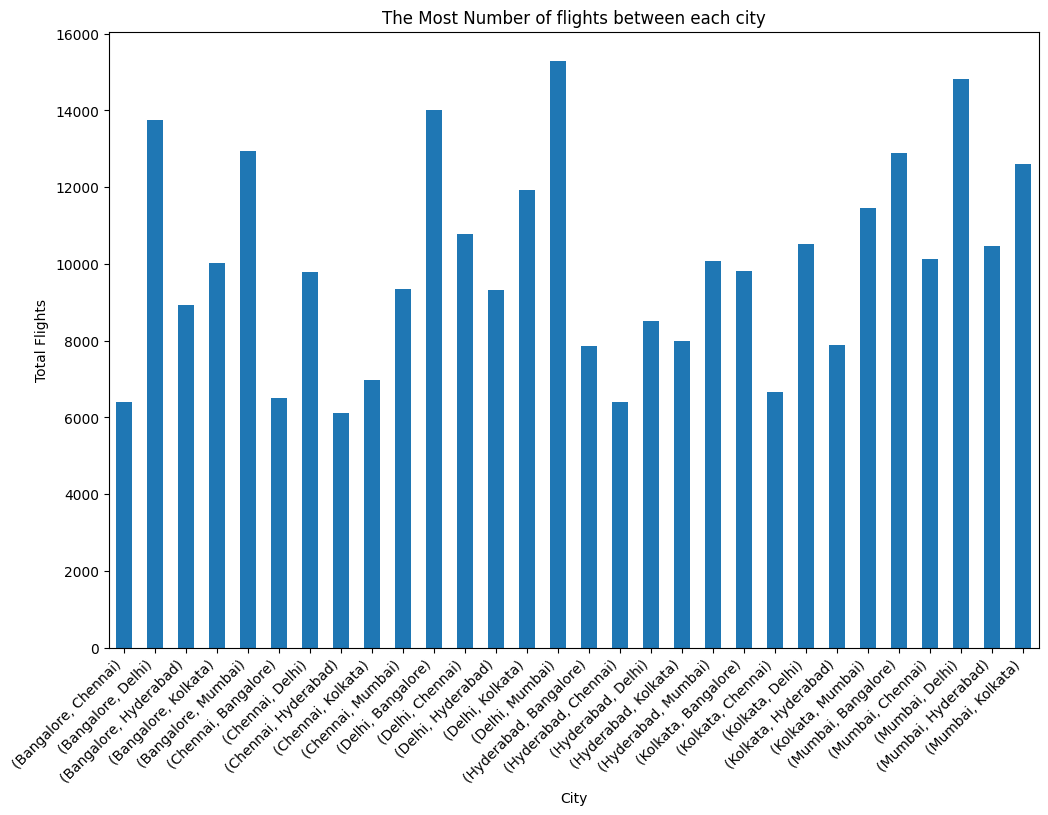

In [59]:
# Question 1: Which routes have the most flights from each city?

most_routes = df.groupby(["source_city", "destination_city"])["flight"].count()

most_routes.plot(kind="bar", figsize=(12, 8))
plt.title("The Most Number of flights between each city")
plt.ylabel("Total Flights")
plt.xticks(rotation=45, ha='right')
plt.xlabel("City")
plt.show()

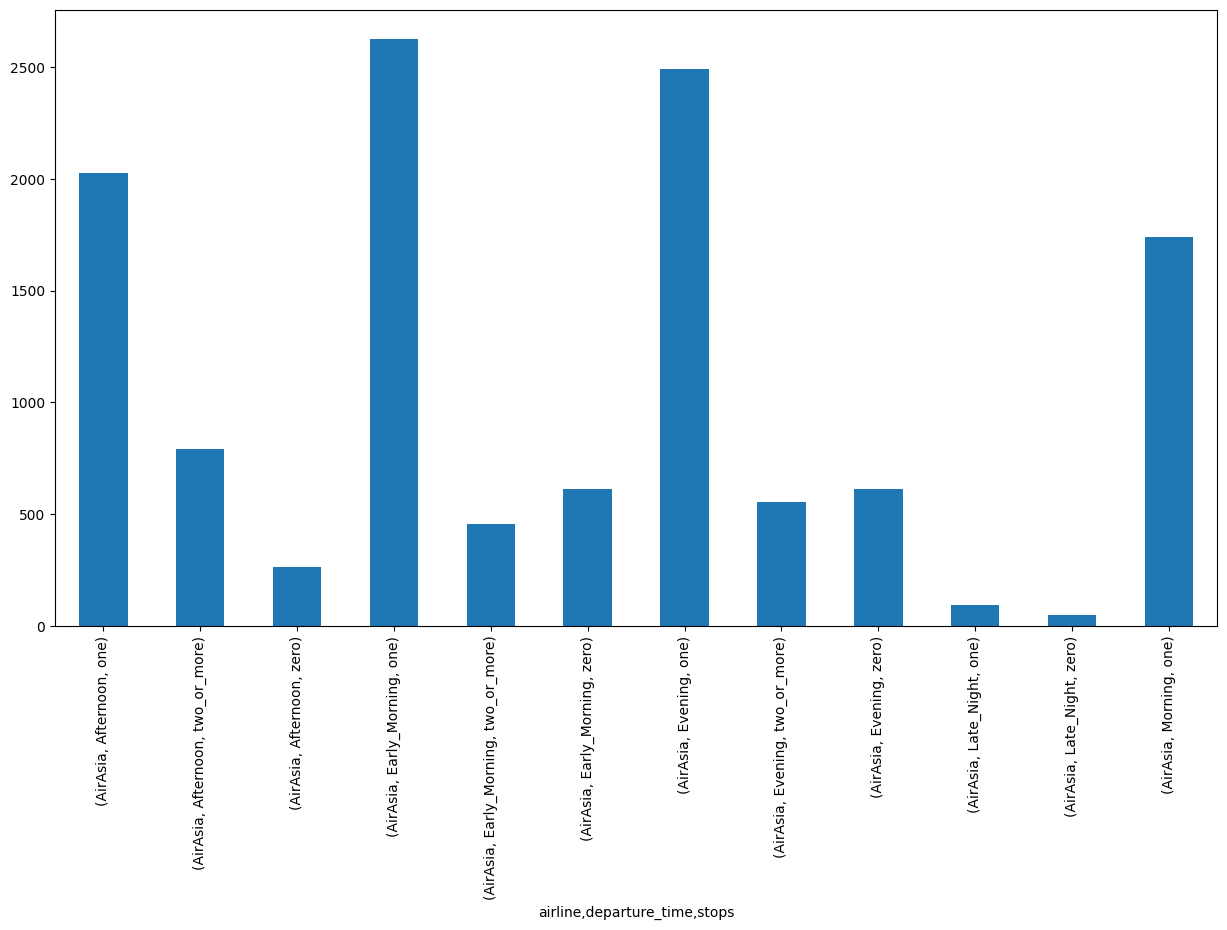

In [62]:
# Question 2: How many flights are there for each airline, categorized by departure time and number of stops?

stops_analysis = df.groupby(["airline", "departure_time", "stops"])["flight"].count().head(12)

stops_analysis.plot(kind="bar", figsize=(15, 8))
plt.show()

<Axes: xlabel='class', ylabel='price'>

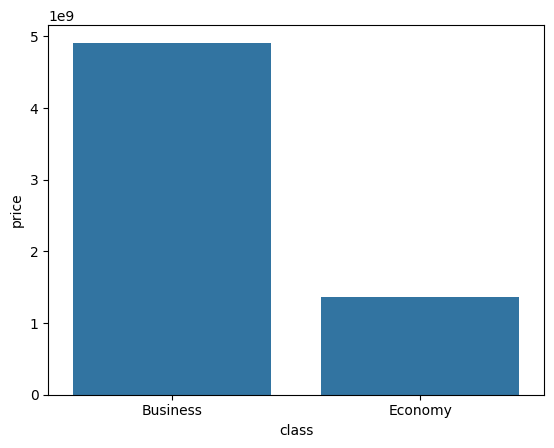

In [67]:
# Question 3: What is the total revenue from ticket sales for each flight type?

revenue_analysis = df.groupby("class")["price"].sum().reset_index()

sns.barplot(revenue_analysis, x=revenue_analysis["class"], y=revenue_analysis["price"])

<Axes: xlabel='source_city,arrival_time'>

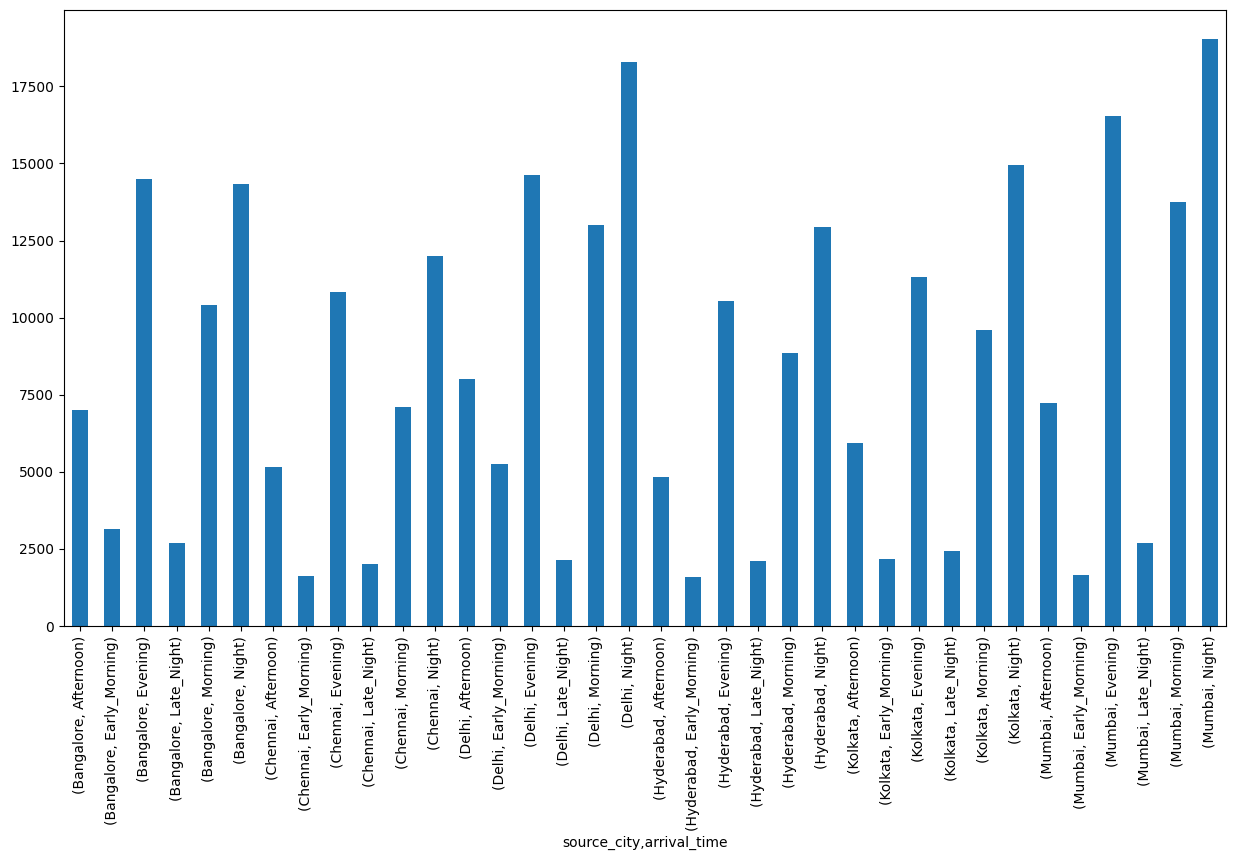

In [70]:
# Question 4: How many flights arrive at each arrival time from each city?

arrival_flights_analysis = df.groupby(["source_city", "arrival_time"])["flight"].count()

arrival_flights_analysis.plot(kind="bar", figsize=(15,8))

In [72]:
# Question 5: Which airlines operate the most flights?

most_flights = df.groupby("airline")["flight"].count().reset_index().sort_values(by="flight", ascending=False)

most_flights

,airline,flight
5,Vistara,127859
1,AirIndia,80892
3,Indigo,43120
2,GOFIRST,23173
0,AirAsia,16098
4,SpiceJet,9011


In [75]:
# Question 6: How many flights does each airline operate by flight type?

flight_classes_analysis = df.groupby(["airline", "class"])["flight"].count()

flight_classes_analysis

airline   class   
AirAsia   Economy     16098
AirIndia  Business    32898
          Economy     47994
GOFIRST   Economy     23173
Indigo    Economy     43120
SpiceJet  Economy      9011
Vistara   Business    60589
          Economy     67270
Name: flight, dtype: int64

In [76]:
# Question 7: What is the total flight duration for each airline?

flight_duration_analysis = df.groupby("airline")["duration"].sum()

flight_classes_analysis

airline   class   
AirAsia   Economy     16098
AirIndia  Business    32898
          Economy     47994
GOFIRST   Economy     23173
Indigo    Economy     43120
SpiceJet  Economy      9011
Vistara   Business    60589
          Economy     67270
Name: flight, dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder

def encode_cats(df):
  encoder = LabelEncoder()

  cat_columns = df.select_dtypes(include="object").columns.tolist()

  cat_columns.remove("flight")

  for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])
  return df

In [85]:
df_new = encode_cats(df)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [86]:
X = df.drop(["flight", "price"],axis=1)
y = df["price"]

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

def model_build(model, X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ", model.score(X_test, y_test))
  print("MSE: ", mean_squared_error(y_test, y_pred))
  print("MAE: ", mean_absolute_error(y_test, y_pred))


In [88]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model_build(model, X, y)

Accuracy:  0.975436981818426
MSE:  12661800.457951356
MAE:  1177.6420571593567


In [89]:
df["price"].std(), df["price"].var()

(22697.767366075885, 515188643.4044994)